In [207]:
import sys
import pandas as pd
import numpy as np
from numpy import log
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#from pandas.core import datetools
from pandas import TimeGrouper

from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [208]:
print(sys.version)

3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


The Minimum Daily Temperatures dataset spans 10 years. 

In [209]:
location_temp  = r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\daily-minimum-temperatures-in-me.csv'

In [210]:
df = pd.read_csv(location_temp)

In [211]:
df.shape

(3650, 2)

In [212]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [213]:
df.dtypes

Date    object
Temp    object
dtype: object

In [214]:
df['Temp'] = pd.to_numeric(df['Temp'], errors='coerce')

In [215]:
# Indexing with Time Series Data
df = df.set_index('Date')
df.index

Index(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04', '1981-01-05',
       '1981-01-06', '1981-01-07', '1981-01-08', '1981-01-09', '1981-01-10',
       ...
       '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25', '1990-12-26',
       '1990-12-27', '1990-12-28', '1990-12-29', '1990-12-30', '1990-12-31'],
      dtype='object', name='Date', length=3650)

In [216]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [217]:
# Add columns with year, month, and weekday name
df['Year']  = pd.DatetimeIndex(df.index).year
df['Month'] = pd.DatetimeIndex(df.index).month

df['Weekday Name'] = pd.DatetimeIndex(df.index).weekday_name

# Display a random sampling of 5 rows
df.sample(5, random_state=0)

,Temp,Year,Month,Weekday Name
Date,,,,
1990-08-20,9.7,1990,8,Monday
1982-07-24,6.6,1982,7,Saturday
1983-09-19,12.0,1983,9,Monday
1986-09-28,6.9,1986,9,Sunday
1988-01-12,18.3,1988,1,Tuesday


# Line Plot

- In this plot, time is shown on the x-axis with observation values along the y-axis.


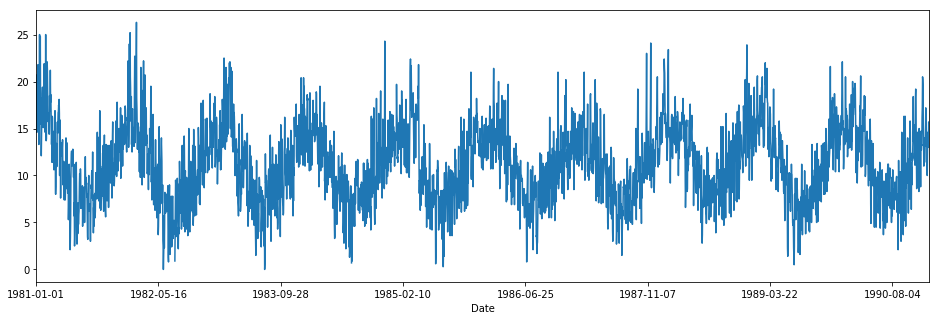

In [218]:
df.Temp.plot(figsize=(16, 5));

The line plot is quite dense.

Sometimes it can help to change the style of the line plot; for example, to use a dashed line or dots.

Below is an example of changing the style of the line to be black dots instead of a connected line (the style=’k.’ argument).

We could change this example to use a dashed line by setting style to be ‘k–‘.

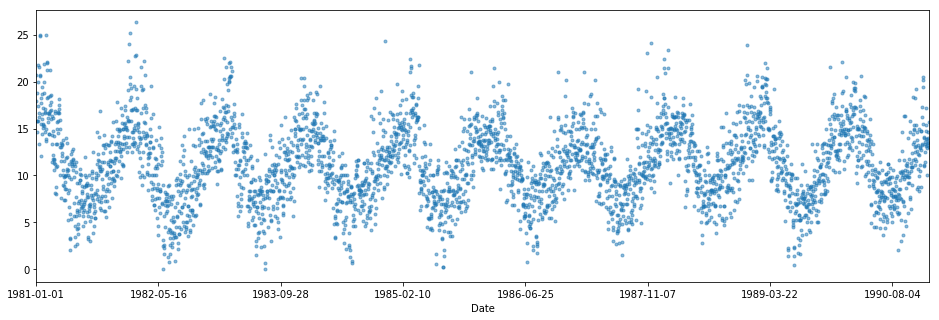

In [219]:
df.Temp.plot(marker='.', 
            alpha=0.5, 
            linestyle='None', 
            figsize=(16, 5), 
            );

# Histogram and Density Plots

- distribution of observations

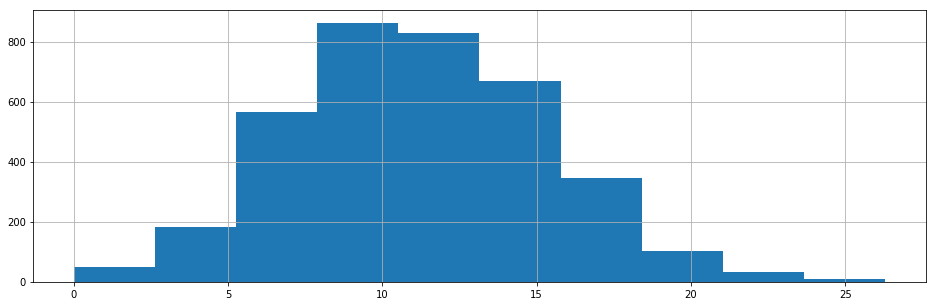

In [220]:
df.Temp.hist(figsize=(16, 5));

distribution that looks strongly Gaussian

# Box and Whisker Plots by Interval

- plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. 

- A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

-  Box and whisker plots can be created and compared for each interval in a time series, such as years, months, or days.

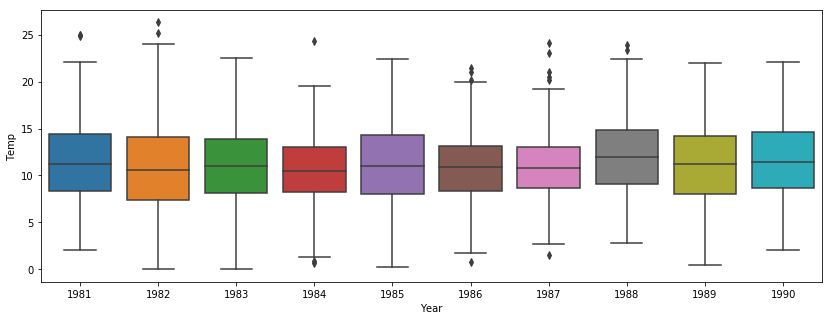

In [221]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x='Year', y='Temp');


# lag plots

- Time series modeling assumes a relationship between an observation and the previous observation.

- Previous observations in a time series are called __lags__, 
    - with the observation at the previous time step called __lag1__ 
    - the observation at 2 time steps ago __lag2__

- A __Lag plot__ is a scatter plot of a time series against a lag of itself. 

- It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

    - if the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.

    - If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.

        > - Either relationship is good as they can be modeled.

    - More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.

    - A ball in the middle or a spread across the plot suggests a weak or no relationship.

- It is normally used to check for __autocorrelation__

    - If there is any pattern existing in the series , the series is __autocorrelated__

    - If there is no such pattern, the series is likely to be __random white noise__ (is it usefule for TS analysis?)

    - In below example on Sunspots area time series, the plots get more and more scattered as the n_lag increases.
    
Pandas has a built-in function for exactly this called the __lag plot__. It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

> Essentially, __Lag plots__ are used to check if a data set or time series is random. 

> Random data should not exhibit any structure in the lag plot. 

> The lag argument may be passed, 

#### Example 1

In [222]:
location_ss  = r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\sunspotarea.csv'
location_a10 = r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\a10.csv'

In [153]:
df_ss = pd.read_csv(location_ss)
df_a10= pd.read_csv(location_a10)


... Explanation

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F72B1CF60>,
      dtype=object)

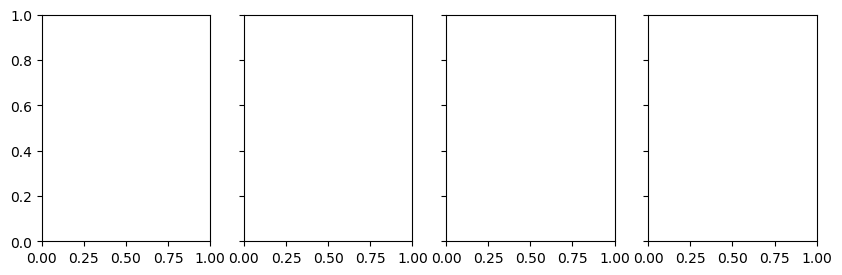

In [154]:
fig, axes = plt.subplots(1, 4, 
                         figsize=(10,3), 
                         sharex=True, 
                         sharey=True, 
                         dpi=100)
axes

In [155]:
axes.flatten()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F72B1CF60>,
      dtype=object)

In [156]:
axes.flatten()[:4]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F72B1CF60>,
      dtype=object)

In [157]:
for i, ax in enumerate(axes.flatten()[:4]):
    print(i, ax)

0 AxesSubplot(0.125,0.125;0.168478x0.755)
1 AxesSubplot(0.327174,0.125;0.168478x0.755)
2 AxesSubplot(0.529348,0.125;0.168478x0.755)
3 AxesSubplot(0.731522,0.125;0.168478x0.755)


... back to the main code

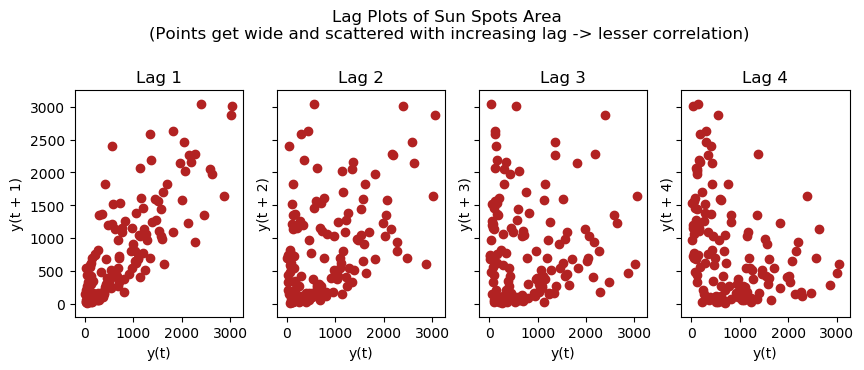

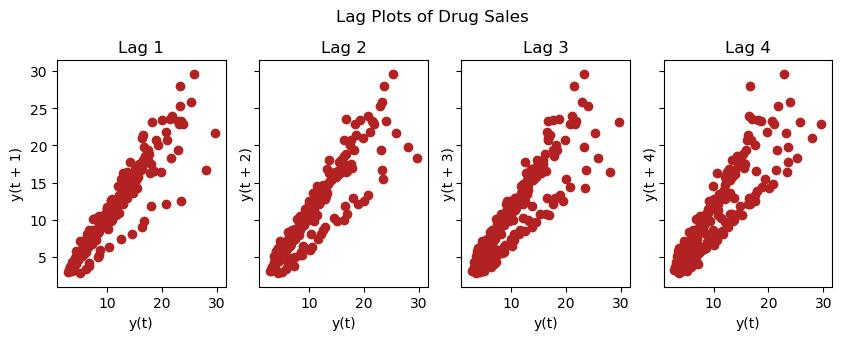

In [158]:
# Plot
fig, axes = plt.subplots(1, 4, 
                         figsize=(10,3), 
                         sharex=True, 
                         sharey=True, 
                         dpi=100)

for i, ax in enumerate(axes.flatten()[:4]):
    
    lag_plot(df_ss.value, 
             lag=i+1, 
             ax=ax, 
             c='firebrick')
    
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, 
                         figsize=(10,3), 
                         sharex=True, 
                         sharey=True, 
                         dpi=100)

for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df_a10.value, 
             lag=i+1, 
             ax=ax, 
             c='firebrick')
    
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    ;

#### Example 2

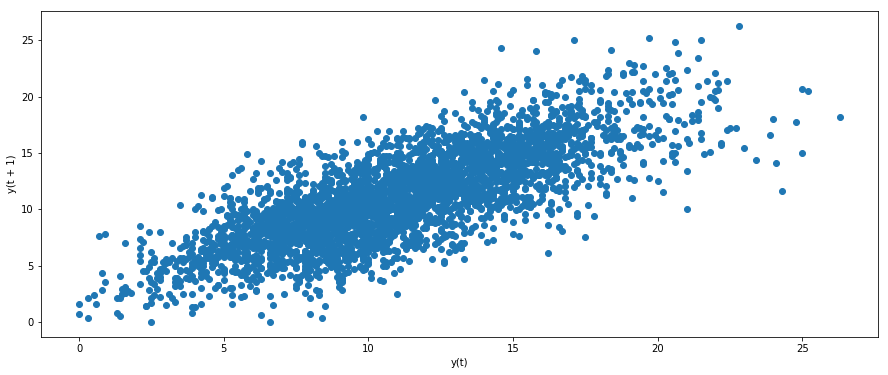

In [159]:
lag_plot(df.Temp, lag=1);

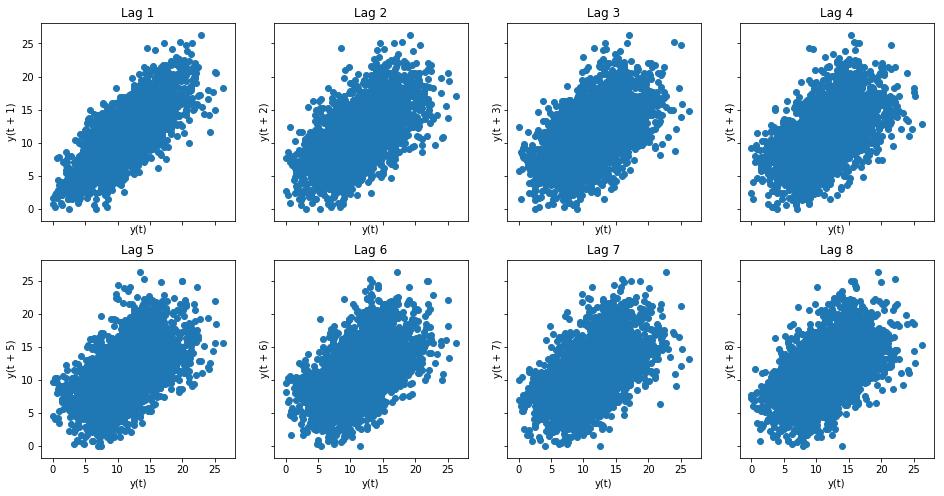

In [160]:
fig, axes = plt.subplots(2, 4, 
                         figsize=(16,8), 
                         sharex=True, 
                         sharey=True, 
                         )

for i, ax in enumerate(axes.flatten()[:8]):
    lag_plot(df.Temp, 
             lag =i+1, 
             ax  =ax )
    
    ax.set_title('Lag ' + str(i+1))

# Autocorrelation Plots

- We can quantify the strength and type of relationship between observations and their lags.

- In statistics, this is called correlation, and when calculated against lag values in time series, it is called __autocorrelation__ (self-correlation).

- For example, an autocorrelation of order 3 returns the correlation between a time series at points (t_1 , t_2 , t_3 , ...) and its own values lagged by 3 time points, i.e. (t_4 , t_5 , t_6 , ...)


- This type of plot is called an __autocorrelation__ plot and Pandas provides this capability built in, called the __autocorrelation_plot()__ function.

If time series is random, such autocorrelations should be near zero for any and all time-lag separations. 

If time series is non-random then one or more of the autocorrelations will be significantly non-zero. 

The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band. 

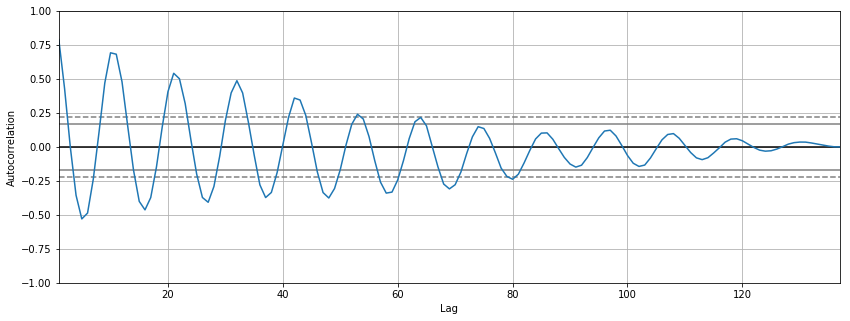

In [161]:
plt.figure(figsize=(14, 5))
autocorrelation_plot(df_ss.value);

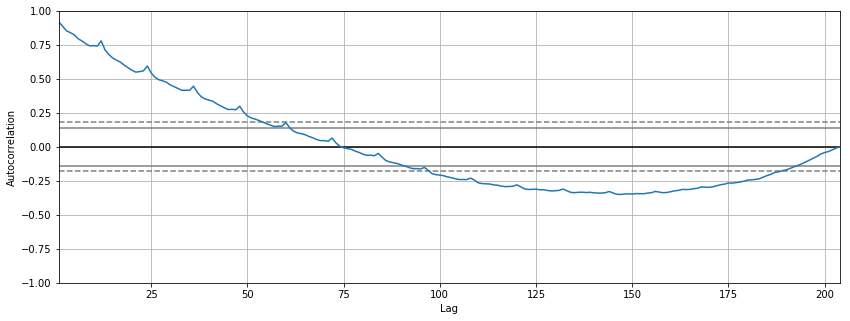

In [162]:
plt.figure(figsize=(14, 5))
autocorrelation_plot(df_a10.value);


#### Example - temp data

In [163]:
location = r'E:\\MYLEARN\2-ANALYTICS-DataScience\datasets\daily-minimum-temperatures-in-me.csv'

In [164]:
temp = pd.read_csv(location, header=0, index_col=0)

In [165]:
temp = temp.apply(pd.to_numeric, errors='coerce')

In [166]:
temp.shape

(3650, 1)

In [167]:
temp.isnull().sum()

Temp    3
dtype: int64

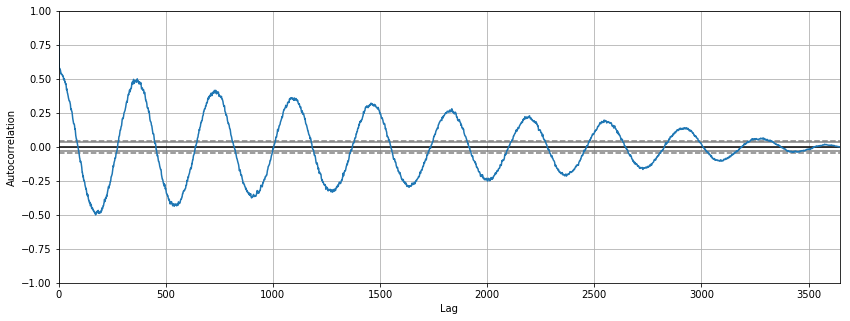

In [168]:
plt.figure(figsize=(14, 5))
autocorrelation_plot(temp.Temp.dropna());

The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful).

We can see that for the Minimum Daily Temperatures dataset we see cycles of strong negative and positive correlation. This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. 

> Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

#### Example - 2

In [169]:
# temps = np.random.uniform(low=68, high=65, size=(15))
temps = np.array([65.2, 
                  65.7, 
                  65.4, 
                  66, 
                  66.1, 
                  66.7, 
                  66, 
                  66.3, 
                  67.05, 
                  68.1, 
                  67.9, 
                  68.3])

n_days= temps.size

days  = np.arange(n_days)

In [170]:
temps

array([65.2 , 65.7 , 65.4 , 66.  , 66.1 , 66.7 , 66.  , 66.3 , 67.05,
       68.1 , 67.9 , 68.3 ])

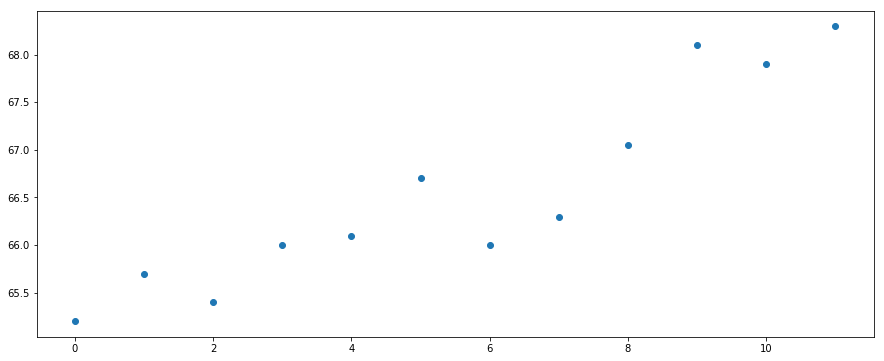

In [171]:
plt.scatter(days, temps);

In [172]:
def find_temp_error(days, temps, intercept, slope):
    #slope = temp_change/1
    
    y_pred = intercept + slope* days
    error  = temps - y_pred
    
    return error

In [173]:
slope, intercept = np.polyfit(days, temps,1)
slope, intercept

(0.27255244755244934, 65.06346153846152)

In [174]:
error = find_temp_error(days, temps, intercept, slope)
error ** 2

array([0.01864275, 0.13248582, 0.04349996, 0.01413272, 0.00288061,
       0.07495342, 0.48828821, 0.45068218, 0.03758989, 0.34054978,
       0.01232411, 0.05686391])

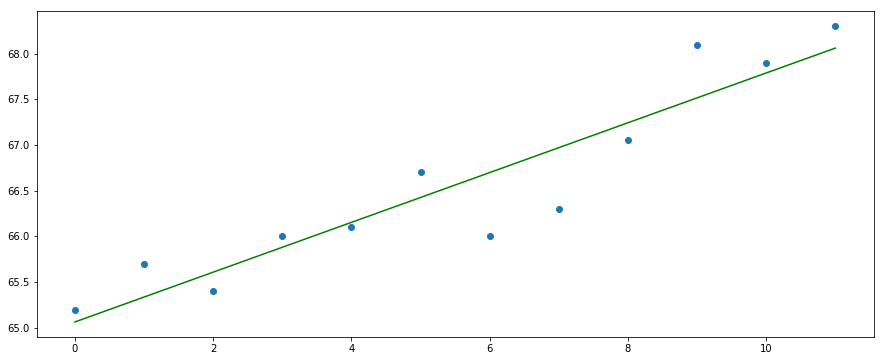

In [175]:
plt.scatter(days, temps);
plt.plot(intercept + slope* days, c='g');

** correlation and lin regression **

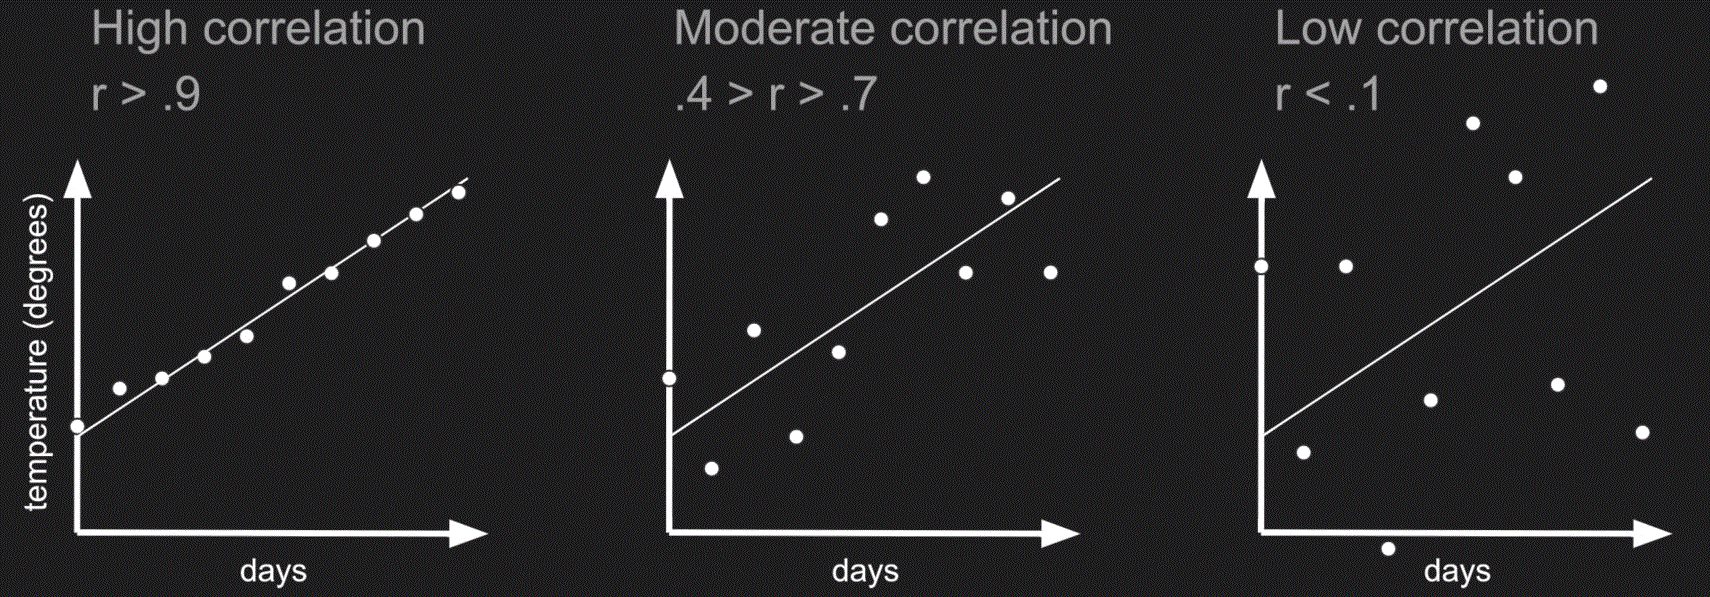

In [176]:
np.corrcoef(days, temps)

array([[1.        , 0.92948589],
       [0.92948589, 1.        ]])

indicates strong correlation

# Autocorrelation - ACF

### Example 1 

In [177]:
temps

array([65.2 , 65.7 , 65.4 , 66.  , 66.1 , 66.7 , 66.  , 66.3 , 67.05,
       68.1 , 67.9 , 68.3 ])

In [178]:
temp_i_mimus_1 = temps[1:]
temp_i_mimus_1

array([65.7 , 65.4 , 66.  , 66.1 , 66.7 , 66.  , 66.3 , 67.05, 68.1 ,
       67.9 , 68.3 ])

In [179]:
temp_i = temps[:-1]
temp_i

array([65.2 , 65.7 , 65.4 , 66.  , 66.1 , 66.7 , 66.  , 66.3 , 67.05,
       68.1 , 67.9 ])

In [180]:
np.corrcoef(temp_i, temp_i_mimus_1)

array([[1.        , 0.86482244],
       [0.86482244, 1.        ]])

In [181]:
# try with lag of 1 ... 10

autocorrelation = []

for shift in range (1, 10):
    temp_shift         = temps[:-shift]
    temp_minus_shift   = temps[shift:]
    
    correlation = np.corrcoef(temp_shift, temp_minus_shift)[0, 1]
    autocorrelation.append(correlation)

autocorrelation

[0.8648224365885038,
 0.7841014961290095,
 0.651456187885959,
 0.8276033989493218,
 0.6878645773983159,
 0.847415811005279,
 0.6728190471331946,
 0.8899168876003994,
 -0.5960395606792479]

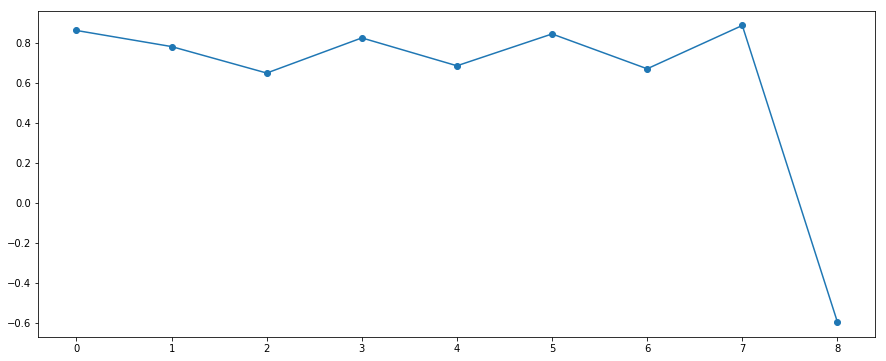

In [182]:
plt.plot(autocorrelation, marker='o')

the further away you get (shift) the lower the correlation ...

## Example - 2 - temp data 

In [183]:
df.shape

(3650, 4)

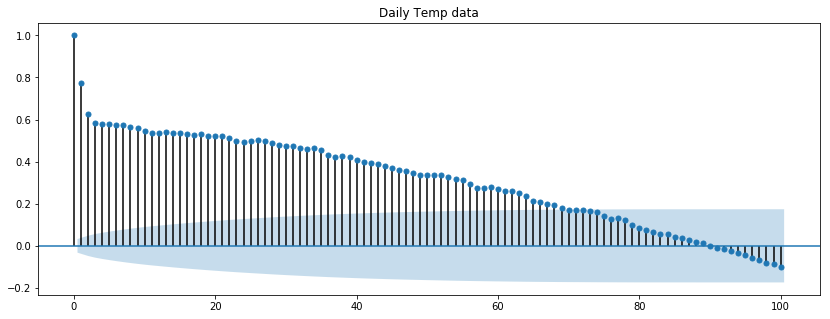

In [184]:
# plot ACF using statsmodel
fig, ax = plt.subplots(figsize=(14, 5))
acf = plot_acf(df.Temp.dropna(), lags = 100, title='Daily Temp data', ax=ax)

# acf = plot_acf(df.Temp.dropna(), lags=100 )

# Partial autocorrelation - PACF

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the __partial autocorrelation__ function removes. 

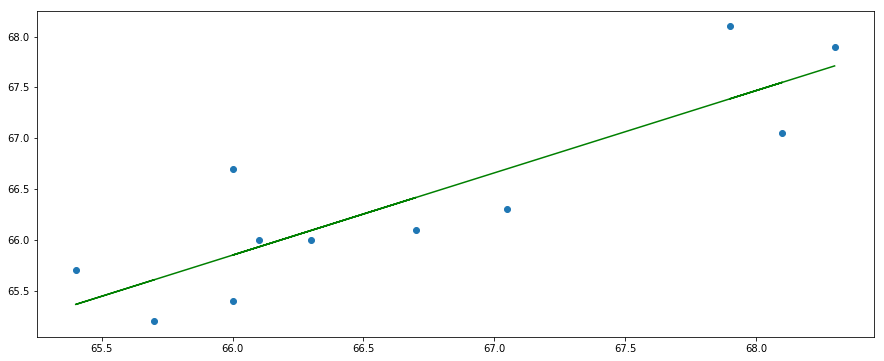

In [185]:
shift=1
temp_shift         = temps[:-shift]
temp_minus_shift   = temps[shift:]

plt.scatter(temp_minus_shift, temp_shift)

# fit the day 1 and day-minus-1 temp and find the regression line and residuals
slope, intercept = np.polyfit(temp_minus_shift, temp_shift, 1)

plt.plot(temp_minus_shift, intercept + slope* temp_minus_shift, c='g');

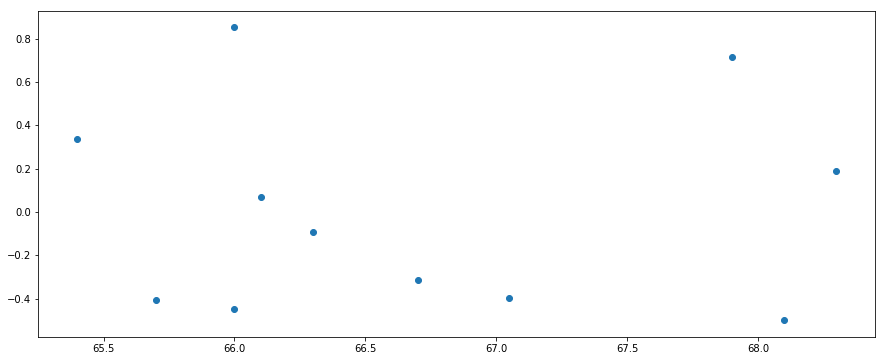

In [186]:
# residual plot
residuals = find_temp_error(temp_minus_shift, temp_shift, intercept, slope)

plt.scatter(temp_minus_shift, residuals)

Now we are going to plot the residuals from day -1 and day-2. 

Fit a line to that scatter

find the residuals...

In [187]:
# partial autocorrelation
pac = []

# start by treating the data as residuals
residuals = temps

for shift in range(1, 10):
    temp_shift         = temps[:-shift]
    temp_minus_shift   = temps[shift:]
    
    correlation = np.corrcoef(temp_shift, residuals[shift:])[0, 1]
    pac.append(correlation)
    
    # fit the new day's data and find the residuals
    slope, intercept = np.polyfit(temp_shift, residuals[shift:], 1)
    
    estimate = intercept + slope * temps[:-shift]
    
    # update the residuals
    residuals[shift:] = residuals[shift:] - estimate
    
pac   

[0.8648224365885038,
 -0.40927994726512273,
 0.1260991391112666,
 -0.18056701374948148,
 0.16812366138412896,
 -0.7741584857394672,
 -0.2975609472613236,
 0.21659393084511022,
 0.8605173448608874]

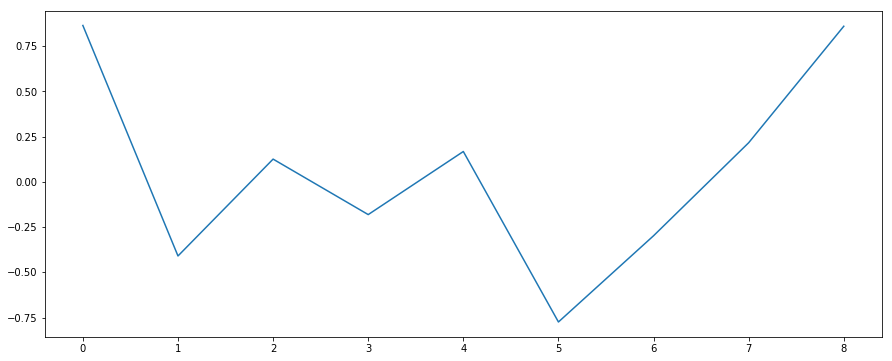

In [188]:
plt.plot(pac);

### Example - 2

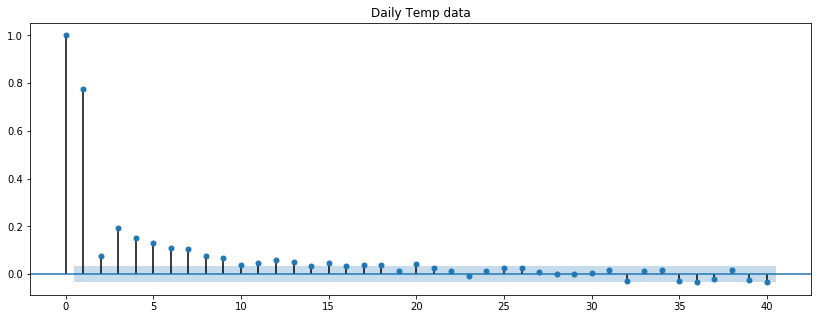

In [189]:
fig, ax = plt.subplots(figsize=(14, 5))
pacf = plot_pacf(df.Temp.dropna(), lags = 40, title='Daily Temp data', ax=ax)

#pacf = plot_pacf(df.Temp.dropna(), lags=50)

# Intuition for ACF and PACF Plots
Plots of the autocorrelation function and the partial autocorrelation function for a time series tell a very different story.

We can use the intuition for ACF and PACF above to explore some thought experiments.

## Autoregression Intuition
Consider a time series that was generated by an autoregression (AR) process with a lag of k.

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.

This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

# Summary

ACF and PACF plots: 

- After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series. 

- By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed. 

- ACF plot: it is merely a bar chart of the coefficients of correlation between a time series and lags of itself. 
- PACF plot: is a plot of the partial correlation coefficients between the series and lags of itself.

A partial autocorrelation is the amount of correlation between a variable and a lag of itself that is not explained by correlations at all lower-order-lags. 

The autocorrelation of a time series Y at lag 1 is the coefficient of correlation between Yt and Yt-1, which is presumably also the correlation between Yt-1 and Yt-2. 

But if Yt is correlated with Yt-1, and Yt-1 is equally correlated with Yt-2, then we should also expect to find correlation between Yt and Yt-2. In fact, the amount of correlation we should expect at lag 2 is precisely the square of the lag-1 correlation. Thus, the correlation at lag 1 "propagates" to lag 2 and presumably to higher-order lags. 

The partial autocorrelation at lag 2 is therefore the difference between the actual correlation at lag 2 and the expected correlation due to the propagation of correlation at lag 1.

## determine the AR and MA terms for ARIMA

In [190]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\FBExample.csv"

In [191]:
data = pd.read_csv(location)

# set date column as index
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data.head()

,Close
Date,
2016-11-21,121.769997
2016-11-22,121.470001
2016-11-23,120.839996
2016-11-25,120.379997
2016-11-28,120.410004


In [192]:
data.shape

(251, 1)

#### First check if the data has a trend

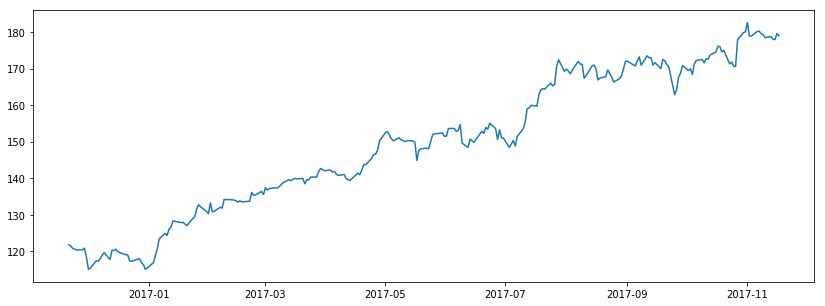

In [193]:
plt.figure(figsize=(14, 5))
plt.plot(data);

In [194]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(data)),
                                              data,
                                              1,
                                              full=True)

mse = residuals[0]/(len(data))
nrmse = np.sqrt(mse)/(data.max() - data.min())

print('Slope ' + str(coefficients[0]))
print('Coeff ' + str(coefficients))
print('NRMSE: ' + str(nrmse))


Slope [0.25876388]
Coeff [[  0.25876388]
 [117.58806133]]
NRMSE: Close    0.052582
dtype: float64


In [195]:
# detrend - differencing
X    = data.values

diff = list()

for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

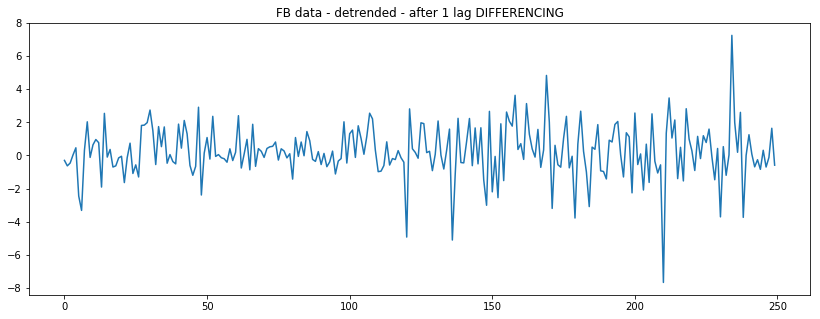

In [196]:
plt.figure(figsize=(14, 5))
plt.title("FB data - detrended - after 1 lag DIFFERENCING")

plt.plot(diff);

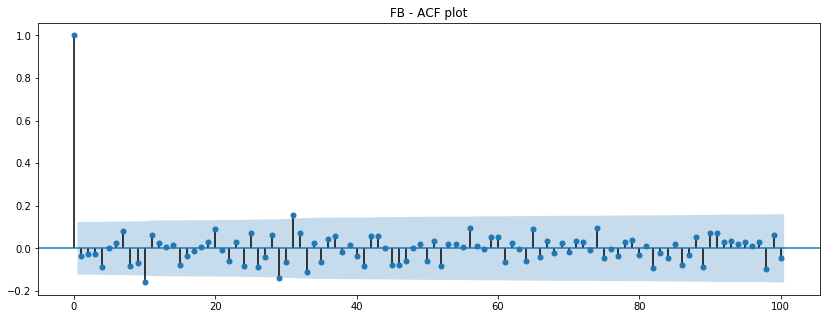

In [197]:
# plot ACF using statsmodel
fig, ax = plt.subplots(figsize=(14, 5))
acf = plot_acf(diff, lags = 100, title='FB - ACF plot', ax=ax)

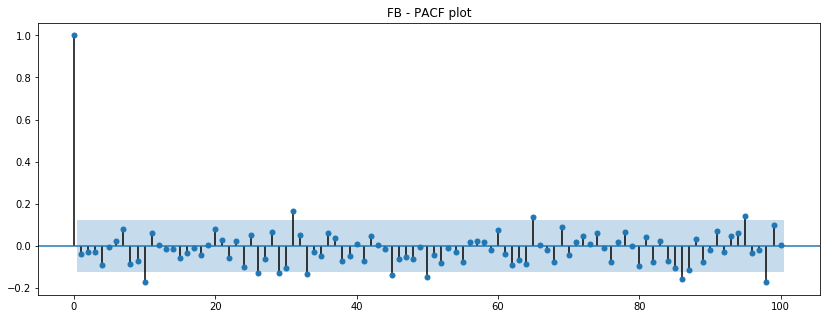

In [198]:
# plot PACF using statsmodel
fig1, ax1 = plt.subplots(figsize=(14, 5))
pacf = plot_pacf(diff, lags = 100, title='FB - PACF plot', ax=ax1)

use PACF significant values for the AR order - in this case 1 (FIRST ORDER AR)

use  ACF significant values for the MA order - in this case 1 (FIRST ORDER MA)

In [199]:
from statsmodels.tsa.arima_model import ARIMA

In [200]:
model = ARIMA(diff, order=(1,1,1))

In [201]:
model_fit = model.fit()

In [202]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  249
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -473.788
Method:                       css-mle   S.D. of innovations              1.604
Date:                Thu, 28 Nov 2019   AIC                            955.577
Time:                        11:34:28   BIC                            969.646
Sample:                             1   HQIC                           961.240
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.798e-05      0.001      0.065      0.949      -0.003       0.003
ar.L1.D.y     -0.0328      0.063     -0.517      0.605      -0.157       0.091
ma.L1.D.y     -1.0000      0.011    -92.593      0.000      -1.021      -0.979
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -30.5115           +0.0000j           30.5115            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [203]:
residuals = model_fit.resid

df_residuals = pd.DataFrame(residuals)

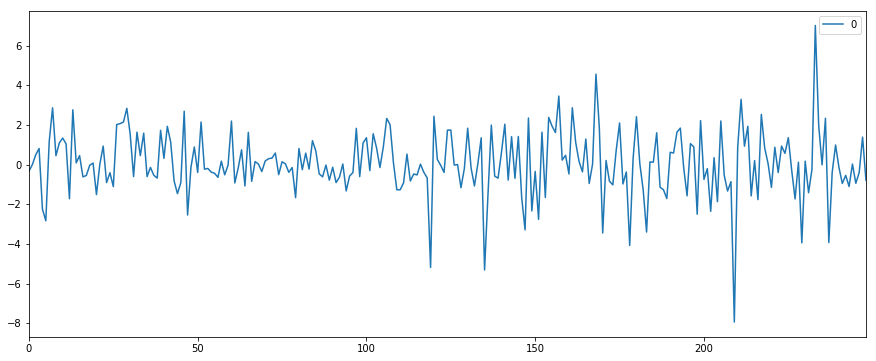

In [204]:
df_residuals.plot();

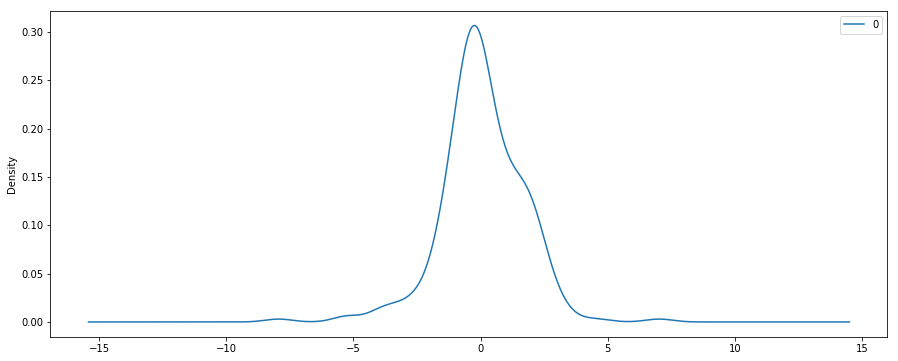

In [205]:
df_residuals.plot(kind='kde');

In [206]:
df_residuals.describe()

,0
count,249.000000
mean,0.062995
std,1.618295
min,-7.938321
25%,-0.690947
50%,-0.009629
75%,1.050137
max,7.024566


## Test your knowledge

## which model (AR or MA) would you use

### Example 1

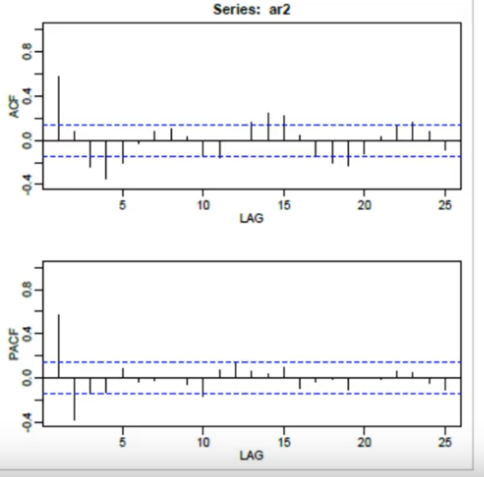

what are the AR and MA terms?

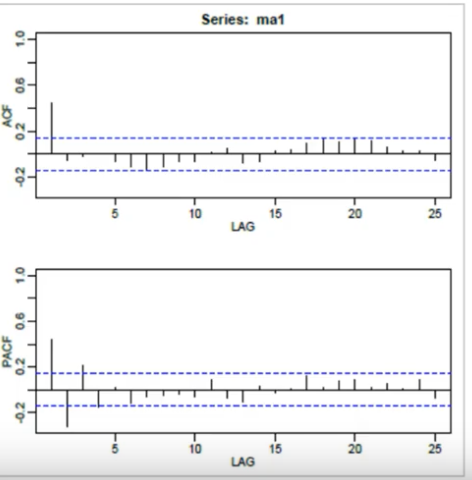

what are the AR and MA terms?

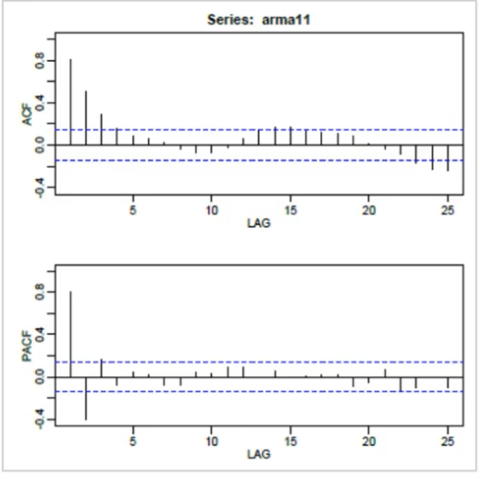

what are the AR and MA terms?

ARMA or ARIMA?